Diego Rosas A01634154
Inteligencia artificial avanzada para la ciencia de datos I (Gpo 102)

Actividad Regresión Lineal

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 12)

Verificamos que no haya valores vacíos

In [ ]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Eliminamos columnas irrelevantes para el análisis de datos

In [ ]:
columns_to_drop = ['work_year', 'job_title', 'Unnamed: 0', 'salary_currency','employee_residence','company_location','company_size']
df.drop(columns_to_drop, axis=1,inplace=True)

In [ ]:
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50
...,...,...,...,...,...
602,SE,FT,154000,154000,100
603,SE,FT,126000,126000,100
604,SE,FT,129000,129000,0
605,SE,FT,150000,150000,100


Verificamos variables regresoras categóricas

In [ ]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

Creamos dummies para convertir las variables categóricas regresoras en variables numéricas

In [ ]:
dummies_exp_level = pd.get_dummies(df['experience_level'], prefix='experience_level')
dummies_emp_type = pd.get_dummies(df['employment_type'], prefix='employment_type')

In [ ]:
dummies_exp_level

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


In [ ]:
dummies_emp_type

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


Concatenamos los dataframes con las variables regresoras numéricas con el dataframe original

In [ ]:
df=pd.concat([df, dummies_exp_level], axis =1)
df=pd.concat([df, dummies_emp_type], axis =1)
df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,SE,FT,154000,154000,100,0,0,0,1,0,0,1,0
603,SE,FT,126000,126000,100,0,0,0,1,0,0,1,0
604,SE,FT,129000,129000,0,0,0,0,1,0,0,1,0
605,SE,FT,150000,150000,100,0,0,0,1,0,0,1,0


Eliminamos las columnas 'experience_level' y 'employment_type' ya que al ser categóricas ya no son relevantes

In [ ]:
df.drop('experience_level', axis=1, inplace=True)
df.drop('employment_type', axis=1, inplace=True)
df.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,0,1,0,0,1,0
2,85000,109024,50,0,0,0,1,0,0,1,0
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,0,1,0,0,1,0


Verificamos la correlación de las variables

In [ ]:
correlacion = df.corr()
correlacion

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
employment_type_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


Verificamos si existe correlación alta

In [ ]:
alta_corr = np.where((correlacion>0.95) & (correlacion<1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

Verificamos si existe correlación baja

In [ ]:
baja_corr = np.where((correlacion<-0.95) & (correlacion>-1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Al no existir correlación alta y baja, se muestra que las variables son independientes

No es necesario estandarizar los datos, pero se reliazó el proceso para mejorar el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_estandar= scaler.fit_transform(df)

In [ ]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

Generamos un data frame para entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba=train_test_split(df_estandar, test_size=0.20,random_state=42)

In [ ]:
entrenamiento

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
9,-0.128962,0.179159,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
227,-0.161365,-0.333488,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
591,-0.116096,0.459192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
516,-0.111141,0.567036,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
132,-0.185084,-1.042301,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.185991,-0.988746,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
106,-0.057677,1.059879,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
270,-0.162985,-0.561334,0.714862,2.428524,-0.211543,-0.735261,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
435,-0.164605,-0.291738,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423


Generamos el modelo de regresión, donde buscamos predecir salary_in_usd, se incluyen todas las variables regresoras del data frame, excepto experience_level_SE y employment_type_PT y se muestra el resumen del modelo.

In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT+employment_type_FL+employment_type_FT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        00:27:37   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1272.
Df Residuals:                     476   BIC:                             1310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0167    

Debido a que la R cuadrada es algo baja, podemos probar eliminar variables irrelevantes según el P valor. Recordado que las variables relevantes son aquellas con un P valor menor a 0.05, generamos una nueva predicción eliminando remote_ratio, employment_type_FL y employment_type_FT ya que su P valor es mayor a 0.05.

In [ ]:
y_aprox = 0 - 0.1455 * prueba['salary'] + - 0.3717 * prueba['experience_level_EN'] + 0.1902 * prueba['experience_level_EX'] - 0.3225 * prueba['experience_level_MI'] + 0.0980 * prueba['employment_type_CT']

In [ ]:
y_aprox

563    0.358337
289    0.358832
76    -0.313609
78     0.754617
182   -0.306254
         ...   
249    0.355532
365    0.358493
453   -0.315495
548    0.362222
235   -0.314552
Length: 122, dtype: float64

Generamos un nuevo modelo con las variables relevantes y visualizamos el resumen

In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     33.04
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           5.65e-29
Time:                        00:27:37   Log-Likelihood:                -629.63
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     479   BIC:                             1296.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0179    

El valor de R cuadrada disminuyó, por lo cual nos quedamos con el primer modelo generado.

Hacemos un análisis de los errores:

In [ ]:
tabla = pd.DataFrame({'Real': prueba['salary_in_usd'], 'Prediccion':y_aprox, 'Errores':prueba['salary_in_usd']-y_aprox})

In [ ]:
tabla

,Real,Prediccion,Errores
563,0.394254,0.358337,0.035917
289,0.320205,0.358832,-0.038627
76,-0.173457,-0.313609,0.140152
78,2.224328,0.754617,1.469711
182,-1.217128,-0.306254,-0.910873
...,...,...,...
249,0.813866,0.355532,0.458334
365,0.370981,0.358493,0.012489
453,0.108636,-0.315495,0.424130
548,-0.186856,0.362222,-0.549078


Generamos un gráfico para analizar los datos reales vs la predicción. Podemos observar que hay algunos resultados cercanos al valor real, sin embargo, la mayoría se aleja del resultado real, lo cual indica que el modelo no es tan preciso.

Text(0, 0.5, 'Prediccion')

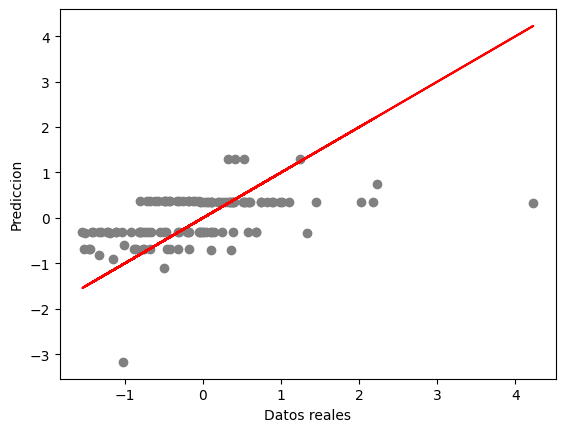

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'],y_aprox,color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

Generamos un gráfico para analizar el valor del residuo y el número de residuo. A partir de este gráfico podemos ver que la mayoría de los residuos se encuentran entre -1 y 1, mayormente cercanos a 0.

Text(0, 0.5, 'Valor del residuo')

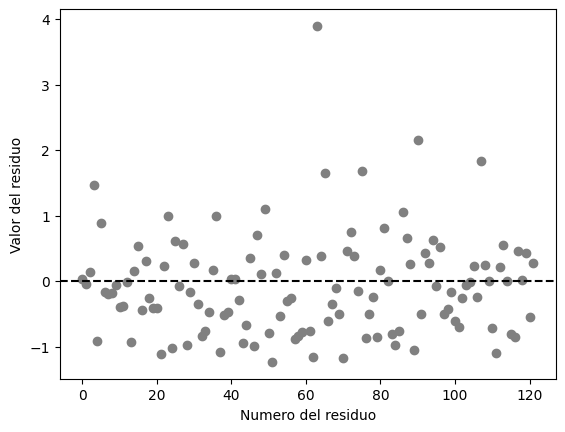

In [ ]:
l_residuos=len(tabla['Errores'])
plt.scatter(range(l_residuos),tabla['Errores'],color='grey')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Generamos un histograma de los residuos, es decir, se muestra la frecuencia de cada residuo. Podemos observar que los residuos que más se repiten están entre -1 y casi 1, tal como se observó en la gráfica anterior

Text(0, 0.5, 'Frecuencia (proba)')

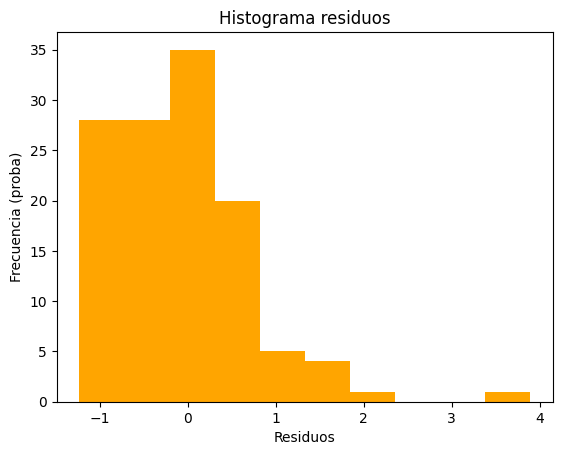

In [ ]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

In [ ]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores']-media)/std

Generamos el test de Kolmogorov. A partir de los resultados podemos concluir que hay evidencia para rechazar la hipótesis nula de que la muestra sigue la distribución teórica. El valor p es 0.4596761652361583, lo que significa que no hay suficiente evidencia para rechazar la hipótesis nula a un nivel de significancia convencional (por ejemplo, alfa = 0.05). Esto sugiere que los datos en la muestra podrían ser consistentes con la distribución teórica que se está probando.

In [ ]:
from scipy import stats
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.07596452486918415, pvalue=0.4596761652361583, statistic_location=0.13876738475801315, statistic_sign=1)

Generamos el QQPlot. Este nos permite observar cuan cerca está la distribución del modelo de prueba a la distribución ideal. Podemos concluir que en algunos puntos el modelo de prueba está cercano a la distribución ideal, principalmente entre -1 y 0 y 2. Sin embargo, el resto de los puntos se aleja un poco de la distribución ideal.

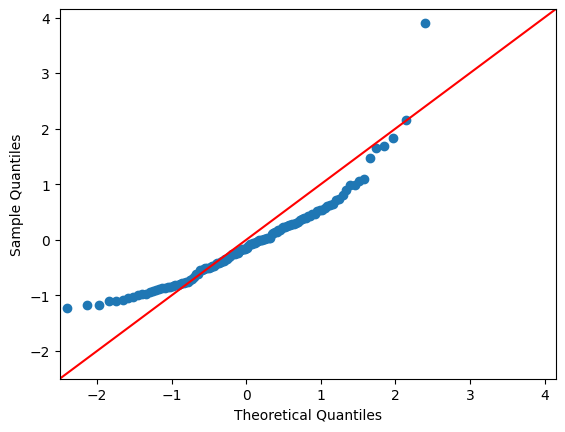

In [ ]:
import statsmodels.api as sm
from scipy import stats
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')